In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [22]:
# ================== STEP 2: LOAD THE DATASETS ==================
df = pd.read_csv('used_cars_dataset.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\n=== MISSING VALUES (FUEL) ===")
print(df.isnull().sum())

print("\n=== UNIQUE VALUES PER COLUMN (FUEL) ===")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Dataset Shape: (4340, 8)

First 5 rows:
                       name  year  km_driven    fuel seller_type transmission  \
0             Maruti 800 AC  2007      70000  Petrol  Individual       Manual   
1  Maruti Wagon R LXI Minor  2007      50000  Petrol  Individual       Manual   
2      Hyundai Verna 1.6 SX  2012     100000  Diesel  Individual       Manual   
3    Datsun RediGO T Option  2017      46000  Petrol  Individual       Manual   
4     Honda Amaze VX i-DTEC  2014     141000  Diesel  Individual       Manual   

          owner  selling_price  
0   First Owner          60000  
1   First Owner         135000  
2   First Owner         600000  
3   First Owner         250000  
4  Second Owner         450000  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 

In [23]:
feature_columns = ['year','km_driven','selling_price']
target_column = 'selling_price'

X = df[feature_columns]
y = df[target_column]

In [24]:
X.shape

(4340, 3)

In [25]:
# ================== STEP 5: TRAIN-TEST SPLIT ==================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# ================== STEP 6: MODEL TRAINING ==================
from sklearn.linear_model import LinearRegression



model_fuel = LinearRegression()



model_fuel.fit(X_train, y_train)

LinearRegression()

In [27]:
# ================== STEP 7: MODEL PREDICTION ==================
y_pred = model_fuel.predict(X_test)

In [28]:

r2 = r2_score(y_test, y_pred)

# Print all metrics nicely
print(f"R² Score: {r2:.4f}")

R² Score: 1.0000


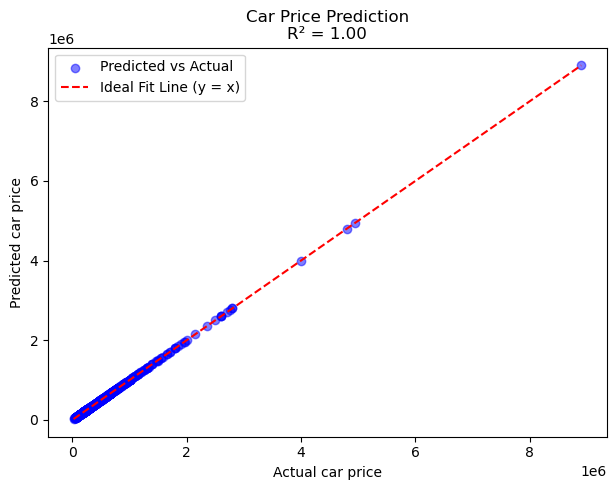

In [29]:
# ================== STEP 9: PLOTTING ==================
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot 1: CO2 Emissions
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal Fit Line (y = x)')
plt.xlabel('Actual car price')
plt.ylabel('Predicted car price')
plt.title(f'Car Price Prediction\nR² = {r2:.2f}')
plt.legend()

plt.tight_layout()
plt.show()